Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [154]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np

%matplotlib inline

In [155]:
df = pd.read_csv('mushroom.csv',skipinitialspace = True, na_values = ['?'], names = ['result','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape', 'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'])
df.head(3)

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m


In [156]:
# I hve dropped the column stalk_root because there was a lot of missing data( 2560 out of 8124) in that column.
df= df.drop(['stalk_root'], axis = 1)

In [157]:
df= df.drop(['veil_type'], axis = 1)

In [158]:
df.describe()

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [159]:
df.shape

(8124, 21)

In [160]:
pd.set_option('display.max_columns', 500) #to not condense the collumns if there are too many of them.
# http://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/

In [161]:
df[pd.isnull(df).any(axis=1)]  #to display the rows where we have a null value

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat


In [162]:
df= df.dropna()
df.head(3)

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m


In [163]:
df.isnull().values.any()

False

In [164]:
df.shape

(8124, 21)

In [165]:
# result: edible=e, poisonous=p
d = {'e': 1, 'p': 2}
df['result'] = df['result'].map(d)

# cap_shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
d = {'b': 1, 'c': 2, 'x': 3, 'f': 4, 'k': 5, 's': 6}
df['cap_shape'] = df['cap_shape'].map(d)

# cap_surface: fibrous=f,grooves=g,scaly=y,smooth=s 
d = {'f': 1, 'g': 2, 'y': 3, 's': 4}
df['cap_surface'] = df['cap_surface'].map(d)

# cap_color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
e = {'n': 1, 'b': 2, 'c': 3, 'g': 4, 'r': 5, 'p': 6, 'u':7, 'e':8, 'w':9, 'y':10}
df['cap_color'] = df['cap_color'].map(e)

# bruises?: bruises=t,no=f 
d = {'t':1, 'f':4}
df['bruises'] = df['bruises'].map(d)

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
d = {'a': 1, 'l': 2, 'c': 3, 'y': 4, 'f': 5, 'm': 6, 'n':7, 'p':8, 's':9}
df['odor'] = df['odor'].map(d)

# gill_attachment: attached=a,descending=d,free=f,notched=n 
d = {'a': 1, 'd': 2, 'f': 3, 'n': 4}
df['gill_attachment'] = df['gill_attachment'].map(d)

# gill_spacing: close=c,crowded=w,distant=d 
d = {'c': 1, 'w': 2, 'd':3}
df['gill_spacing'] = df['gill_spacing'].map(d)

# gill_size: broad=b,narrow=n 
d = {'b': 1, 'n': 2}
df['gill_size'] = df['gill_size'].map(d)

#gill_color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y  
d = {'k': 1, 'n': 2, 'b': 3, 'h': 4, 'g': 5, 'r': 6, 'o': 7, 'p': 8, 'u': 9, 'e':10, 'w':11, 'y':12}
df['gill_color'] = df['gill_color'].map(d)

# stalk_shape: enlarging=e,tapering=t
e = {'e': 1, 't': 2}
df['stalk_shape'] = df['stalk_shape'].map(e)

# # stalk_root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
# d = {'b':1, 'c':2, 'u':3, 'e':4, 'z':5, 'r':6, '?':7}
# df['stalk_root'] = df['stalk_root'].map(d)

# stalk_surface_above_ring: fibrous=f,scaly=y,silky=k,smooth=s 
d = {'f': 1, 'y': 2, 'k': 3, 's': 4}
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].map(d)

# stalk_surface_below_ring: fibrous=f,scaly=y,silky=k,smooth=s 
d = {'f': 1, 'y': 2, 'k': 3, 's': 4}
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].map(d)

# # stalk_color_above_ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
e = {'n': 1, 'b': 2, 'c': 3, 'g': 4, 'o': 5, 'p': 6, 'e':7, 'w':8, 'y':9}
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].map(e)

# stalk_color_below_ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].map(e)

# veil_type: partial=p,universal=u 
# e = {'p': 1, 'u': 2}
# df['veil_type'] = df['veil_type'].map(e) 

#veil_color: brown=n,orange=o,white=w,yellow=y 
e = {'n': 1, 'o': 2, 'w': 3, 'y': 4}
df['veil_color'] = df['veil_color'].map(e)

# ring_number: none=n,one=o,two=t 
d = {'n':1, 'o':2, 't':3}
df['ring_number'] = df['ring_number'].map(d)

# ring_type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
d = {'c': 1, 'e': 2, 'f': 3, 'l': 4, 'n': 5, 'p': 6, 's':7, 'z':8}
df['ring_type'] = df['ring_type'].map(d)

# spore_print_color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
d = {'k': 1, 'n': 2, 'b': 3, 'h': 4, 'r': 5, 'o':6, 'u':7, 'w':8,'y':9}
df['spore_print_color'] = df['spore_print_color'].map(d)

#  population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
d = {'a': 1, 'c': 2, 'n':3, 's':4, 'v':5, 'y':6}
df['population'] = df['population'].map(d)

# habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
d = {'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6, 'd':7}
df['habitat'] = df['habitat'].map(d)

In [166]:
df.head(10)

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,2,3,4,1,1,8,3,1,2,1,1,4,4,8,8,3,2,6,1,4,5
1,1,3,4,10,1,1,3,1,1,1,1,4,4,8,8,3,2,6,2,3,1
2,1,1,4,9,1,2,3,1,1,2,1,4,4,8,8,3,2,6,2,3,3
3,2,3,3,9,1,8,3,1,2,2,1,4,4,8,8,3,2,6,1,4,5
4,1,3,4,4,4,7,3,2,1,1,2,4,4,8,8,3,2,2,2,1,1
5,1,3,3,10,1,1,3,1,1,2,1,4,4,8,8,3,2,6,1,3,1
6,1,1,4,9,1,1,3,1,1,5,1,4,4,8,8,3,2,6,1,3,3
7,1,1,3,9,1,2,3,1,1,2,1,4,4,8,8,3,2,6,2,4,3
8,2,3,3,9,1,8,3,1,2,8,1,4,4,8,8,3,2,6,1,5,1
9,1,1,4,10,1,1,3,1,1,5,1,4,4,8,8,3,2,6,1,4,3


In [167]:
# import matplotlib.pyplot as plt

# def plot_corr(df, size = 11):
#     corr = df.corr()
#     fig, ax = plt.subplots(figsize=(size, size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)), corr.columns)
#     plt.yticks(range(len(corr.columns)), corr.columns)

In [168]:
# plot_corr(df)

In [169]:
# df.head()

In [170]:
df.describe()

,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,1.482029,3.491876,2.742984,5.323486,2.753323,5.788282,2.948301,1.161497,1.309207,5.729444,1.567208,3.498277,3.424914,6.446578,6.393402,2.965534,2.069424,4.291974,4.062038,4.644018,4.221073
std,0.499708,0.901287,1.179629,3.444391,1.478545,1.983678,0.317391,0.368011,0.462195,3.342402,0.495493,0.814658,0.870347,2.143900,2.194604,0.242669,0.271064,1.801672,2.825308,1.252082,2.530692
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,6.000000,6.000000,3.000000,2.000000,2.000000,2.000000,4.000000,1.000000
50%,1.000000,3.000000,3.000000,4.000000,4.000000,7.000000,3.000000,1.000000,1.000000,5.000000,2.000000,4.000000,4.000000,8.000000,8.000000,3.000000,2.000000,4.000000,4.000000,5.000000,4.000000
75%,2.000000,4.000000,4.000000,9.000000,4.000000,7.000000,3.000000,1.000000,2.000000,8.000000,2.000000,4.000000,4.000000,8.000000,8.000000,3.000000,2.000000,6.000000,8.000000,5.000000,7.000000
max,2.000000,6.000000,4.000000,10.000000,4.000000,9.000000,3.000000,2.000000,2.000000,12.000000,2.000000,4.000000,4.000000,9.000000,9.000000,4.000000,3.000000,6.000000,9.000000,6.000000,7.000000


In [171]:
# df.head()

In [172]:

all_features = df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape','stalk_surface_above_ring','stalk_surface_below_ring', 
                   'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']].values


all_classes = df['result'].values

feature_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                                                      'gill_color', 'stalk_shape', 'stalk_surface_above_ring','stalk_surface_below_ring', 
                   'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

all_features

array([[ 3,  4,  1, ...,  1,  4,  5],
       [ 3,  4, 10, ...,  2,  3,  1],
       [ 1,  4,  9, ...,  2,  3,  3],
       ...,
       [ 4,  4,  1, ...,  3,  2,  2],
       [ 5,  3,  1, ...,  8,  5,  2],
       [ 3,  4,  1, ...,  6,  2,  2]], dtype=int64)

In [173]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.54578187,  1.06566882, -1.25530239, ..., -1.08385612,
        -0.5143892 ,  0.30781092],
       [-0.54578187,  1.06566882,  1.35780231, ..., -0.72989057,
        -1.31310821, -1.2728818 ],
       [-2.764967  ,  1.06566882,  1.06745734, ..., -0.72989057,
        -1.31310821, -0.48253544],
       ...,
       [ 0.5638107 ,  1.06566882, -1.25530239, ..., -0.37592501,
        -2.11182722, -0.87770862],
       [ 1.67340326,  0.21789233, -1.25530239, ...,  1.39390276,
         0.28432981, -0.87770862],
       [-0.54578187,  1.06566882, -1.25530239, ...,  0.68597165,
        -2.11182722, -0.87770862]])

In [206]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators= 10000,
                               random_state =0,
                               n_jobs= -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_ 
indices= np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("2%d) %-*s %f" %(f+1,30, feat_labels[f], importances[indices[f]]))
    


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


21) index                          0.637348
22) result                         0.163966
23) cap_shape                      0.083039
24) cap_surface                    0.069665
25) cap_color                      0.036237
26) bruises                        0.009745


In [175]:

df= df.drop(['gill_spacing'], axis = 1)
df= df.drop(['gill_size'], axis = 1)
df= df.drop(['gill_color'], axis = 1)
df= df.drop(['stalk_shape'], axis = 1)
df= df.drop(['stalk_surface_above_ring'], axis = 1)
df= df.drop(['stalk_surface_below_ring'], axis = 1)
df= df.drop(['stalk_color_above_ring'], axis = 1)
df= df.drop(['stalk_color_below_ring'], axis = 1)
df= df.drop(['veil_color'], axis = 1)
df= df.drop(['ring_number'], axis = 1)
df= df.drop(['ring_type'], axis = 1)
df= df.drop(['spore_print_color'], axis = 1)
df= df.drop(['population'], axis = 1)
df= df.drop(['habitat'], axis = 1)


In [176]:
all_features = df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment']].values


all_classes = df['result'].values

feature_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment']

all_features

array([[ 3,  4,  1,  1,  8,  3],
       [ 3,  4, 10,  1,  1,  3],
       [ 1,  4,  9,  1,  2,  3],
       ...,
       [ 4,  4,  1,  4,  7,  1],
       [ 5,  3,  1,  4,  4,  3],
       [ 3,  4,  1,  4,  7,  1]], dtype=int64)

In [177]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.54578187,  1.06566882, -1.25530239, -1.18591657,  1.11502673,
         0.16289645],
       [-0.54578187,  1.06566882,  1.35780231, -1.18591657, -2.41398818,
         0.16289645],
       [-2.764967  ,  1.06566882,  1.06745734, -1.18591657, -1.9098432 ,
         0.16289645],
       ...,
       [ 0.5638107 ,  1.06566882, -1.25530239,  0.84322964,  0.61088174,
        -6.13886914],
       [ 1.67340326,  0.21789233, -1.25530239,  0.84322964, -0.90155322,
         0.16289645],
       [-0.54578187,  1.06566882, -1.25530239,  0.84322964,  0.61088174,
        -6.13886914]])

In [178]:
from sklearn.tree import DecisionTreeClassifier
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn import tree
from datetime import datetime

startTime = datetime.now()


(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)


clf= DecisionTreeClassifier(criterion = 'entropy', random_state=0)

# Train the classifier on the training set
clf.fit(X_train, y_train)
print()
print(datetime.now() - startTime)


0:00:00.007978


In [179]:
X = np.array(df.drop(['result'], 1).astype(float))
len(X)

8124

In [180]:
y = np.array(df['result'])

## Expectation Maximization

In [189]:
from sklearn import mixture

In [190]:
df.head()

,index,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,labels
0,0,2,3,4,1,1,8,3,2
1,1,1,3,4,10,1,1,3,2
2,2,1,1,4,9,1,2,3,2
3,3,2,3,3,9,1,8,3,2
4,4,1,3,4,4,4,7,3,2


In [191]:
df = df.reset_index()
df.head()

,level_0,index,result,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,labels
0,0,0,2,3,4,1,1,8,3,2
1,1,1,1,3,4,10,1,1,3,2
2,2,2,1,1,4,9,1,2,3,2
3,3,3,2,3,3,9,1,8,3,2
4,4,4,1,3,4,4,4,7,3,2


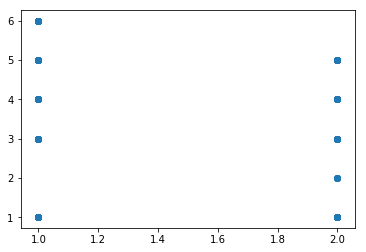

In [202]:
# https://stackoverflow.com/questions/43386493/what-is-the-correct-way-to-fit-a-gaussian-mixture-model-to-single-feature-data
# https://www.geeksforgeeks.org/gaussian-mixture-model/
g = mixture.GaussianMixture(n_components=4, covariance_type='full')
g.fit(df)

plt.scatter( df['result'],df['cap_shape'])
#df['cap_shape'],df['cap_surface'], df['cap_color'],df['bruises'], df['odor'], df['gill_attachment']



In [203]:
df = pd.DataFrame(df) 

g = mixture.GaussianMixture(n_components=4, covariance_type='full')
g.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [204]:
labels = g.predict(df) 
df['labels']= labels 

In [205]:
d0 = df[df['labels']== 0] 
d1 = df[df['labels']== 1] 
d2 = df[df['labels']== 2] 
d3 = df[df['labels']== 3]
d4 = df[df['labels']== 4] 
d5 = df[df['labels']== 5] 
d6 = df[df['labels']== 6]

21) index                          0.637348  
22) result                         0.163966  
23) cap_shape                      0.083039  
24) cap_surface                    0.069665  
25) cap_color                      0.036237  
26) bruises                        0.009745  

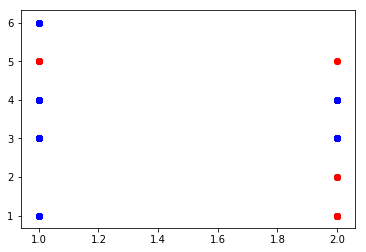

In [208]:

# plot three clusters in same plot 
plt.scatter(d0['result'], d0['cap_shape'], c ='green') 
plt.scatter(d1['result'], d1['cap_shape'], c ='yellow') 
plt.scatter(d2['result'], d2['cap_shape'], c ='red')
plt.scatter(d3['result'], d3['cap_shape'], c ='blue')
plt.scatter(d4['result'], d4['cap_shape'], c ='grey') 
plt.scatter(d5['result'], d5['cap_shape'], c ='pink')
plt.scatter(d6['result'], d6['cap_shape'], c ='brown')

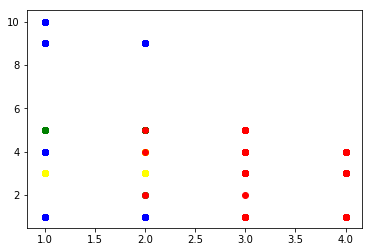

In [209]:
# plot three clusters in same plot 
plt.scatter(d0['result'], d0['cap_shape'], c ='green') 
plt.scatter(d1['result'], d1['cap_surface'], c ='yellow') 
plt.scatter(d2['cap_surface'], d2['cap_shape'], c ='red')
plt.scatter(d3['result'], d3['cap_color'], c ='blue')
plt.scatter(d4['cap_color'], d4['cap_shape'], c ='grey') 
plt.scatter(d5['result'], d5['bruises'], c ='pink')
plt.scatter(d6['bruises'], d6['cap_shape'], c ='brown')

In [210]:
# print the converged log-likelihood value 
print(g.lower_bound_) 


4.639030563439128


In [211]:
# print the number of iterations needed 
# for the log-likelihood value to converge 
print(g.n_iter_)

7
